# ONE-WAY & TWO-WAY ANOVA WITH PYTHON

In [1]:
# importing necessary libraries
import pandas as pd
import researchpy as rp

In [2]:
# loading data using pandas
data = pd.read_csv('Rice_Station_Data_Extraction_Non_Uniform_Filtered.csv')

In [3]:
# Get 1st 5 rows of data
data.head()

,Planting date,Software,Location,Date,DOY,Altitude (m),Stage-Full,Stage,Plot_ID,Replicate,...,RVI,TVI,CVI,NDVI,DVI,Soy_yiled(bu/acre),Observed data,Days after planting,Canopy Height (cm),LAI
0,NaN,Pix4d,Rice_Station,1/22/2021,22,120,NaN,NaN,101,1,...,1.236684,2.960273,1.712160,0.105216,0.041239,66.73,NaN,NaN,NaN,NaN
1,NaN,Pix4d,Rice_Station,1/22/2021,22,120,NaN,NaN,102,1,...,1.229085,2.904267,1.694055,0.102217,0.038293,54.65,NaN,NaN,NaN,NaN
2,NaN,Pix4d,Rice_Station,1/22/2021,22,120,NaN,NaN,103,1,...,1.200309,2.315448,1.665547,0.090710,0.033462,56.88,NaN,NaN,NaN,NaN
3,NaN,Pix4d,Rice_Station,1/22/2021,22,120,NaN,NaN,104,1,...,1.252164,3.167063,1.749084,0.111270,0.038114,56.05,NaN,NaN,NaN,NaN
4,NaN,Pix4d,Rice_Station,1/22/2021,22,120,NaN,NaN,105,1,...,1.171546,1.422839,1.660871,0.078602,0.026899,51.59,NaN,NaN,NaN,NaN


In [4]:
# check column names of the dataset
data.columns

Index(['Planting date', 'Software', 'Location', 'Date', 'DOY', 'Altitude (m)',
       'Stage-Full', 'Stage', 'Plot_ID', 'Replicate', 'Zone',
       'Zone_Identification', 'Cover_Crop_Variety',
       'Treatment_2__Cut_Fill_Range', 'One_Mix_None_Cover_Crop', 'Thermal',
       'NDWI', 'EVI', 'NAVI', 'GNDVI', 'Cigreen', 'RENDVI', 'TGI', 'SAVI',
       'CI_RedEdge', 'BI', 'SCI', 'GLI', 'NGRDI_Zonal', 'SI', 'VARI', 'HUE',
       'BGI', 'PSRI', 'RVI', 'TVI', 'CVI', 'NDVI', 'DVI', 'Soy_yiled(bu/acre)',
       'Observed data', 'Days after planting', 'Canopy Height (cm)', 'LAI'],
      dtype='object')

In [5]:
# slice data for columns needed
slice_data = data[['Replicate','Zone_Identification', 'Cover_Crop_Variety','NDWI', 'EVI', 'NAVI', 'GNDVI', 'Cigreen', 'RENDVI', 'TGI', 'SAVI',
       'CI_RedEdge', 'BI', 'SCI', 'GLI', 'NGRDI_Zonal', 'SI', 'VARI', 'HUE',
       'BGI', 'PSRI', 'RVI', 'TVI', 'CVI', 'NDVI', 'DVI', 'Soy_yiled(bu/acre)']]
slice_data.head()

,Replicate,Zone_Identification,Cover_Crop_Variety,NDWI,EVI,NAVI,GNDVI,Cigreen,RENDVI,TGI,...,VARI,HUE,BGI,PSRI,RVI,TVI,CVI,NDVI,DVI,Soy_yiled(bu/acre)
0,1,"12"""" Cut",Triticale (TR),-0.184036,0.115173,0.189628,0.184036,0.454413,0.048335,2.491183,...,-0.123967,0.001565,0.765767,0.132600,1.236684,2.960273,1.712160,0.105216,0.041239,66.73
1,1,"12"""" Cut",Cereal Rye+ Black Oat+ Triticale (CR+BO+TR),-0.180077,0.113556,0.184759,0.180077,0.442328,0.043734,2.593134,...,-0.122405,0.001630,0.765593,0.130579,1.229085,2.904267,1.694055,0.102217,0.038293,54.65
2,1,"12"""" Cut",Black Oat (BO),-0.170547,0.101767,0.165882,0.170547,0.413386,0.037456,2.643563,...,-0.124985,0.001800,0.765344,0.134701,1.200309,2.315448,1.665547,0.090710,0.033462,56.88
3,1,"12"""" Cut",Cereal Rye+ Crimson Clover+ Kale (CR+CC+KA),-0.192279,0.119973,0.199392,0.192279,0.479366,0.044786,2.429277,...,-0.127238,0.001557,0.762464,0.133726,1.252164,3.167063,1.749084,0.111270,0.038114,56.05
4,1,"12"""" Cut",NC,-0.163843,0.084100,0.145183,0.163843,0.394377,0.032093,2.440546,...,-0.132432,0.001773,0.762492,0.144659,1.171546,1.422839,1.660871,0.078602,0.026899,51.59


In [ ]:
# Summary stats of dependent variable: DVI

In [30]:
rp.summary_cont(data['DVI'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,DVI,1920.0,0.1889,0.1469,0.0034,0.1823,0.1954


In [ ]:
# Summary stats of dependent variable: DVI for each zone_identification level

In [31]:
rp.summary_cont(data['DVI'].groupby(data['Zone_Identification']))

,N,Mean,SD,SE,95% Conf.,Interval
Zone_Identification,,,,,,
"12"""" Cut",384,0.1267,0.0931,0.0048,0.1174,0.1360
"12"""" Fill",384,0.2093,0.1538,0.0079,0.1938,0.2247
"6"""" Cut",384,0.1761,0.1364,0.0070,0.1624,0.1898
"6"""" Fill",384,0.2208,0.1591,0.0081,0.2049,0.2368
No Fill No Cut,384,0.2115,0.1607,0.0082,0.1954,0.2276


#                              1 way ANOVA for Zone_identification

## 1 way ANOVA tests effect of 1 independent variable on 1 dependant variable 
H0: The mean value of DVI is same across different Zone_Identification levels or there is no significant effect of Zone_Identification on the mean of DVI
Ha: The mean value of DVI is not same across different Zone_Identification levels or there is significant effect of Zone_Identification level on the mean of DVI

## ONE-WAY ANOVA USING SCIPY.STATS

In [32]:
# import library, method
import scipy.stats as sts

# one way ANOVA 
one_way=sts.f_oneway(data['DVI'][data['Zone_Identification']=='12"" Cut'],
             data['DVI'][data['Zone_Identification']=='12"" Fill'],
             data['DVI'][data['Zone_Identification']=='6"" Cut'],
             data['DVI'][data['Zone_Identification']=='6"" Fill'],
             data['DVI'][data['Zone_Identification']=='No Fill No Cut'])

print('for DVI:' ,one_way)

for DVI: F_onewayResult(statistic=28.105762541861807, pvalue=1.0245070228905004e-22)


## Interpretation of 1 way ANOVA for DVI at different Zone_levels

Since pvalue (1.02) is way higher than critical value (α=0.05), I fail to reject the null hypothesis of equal DVI means and conclude that there is no statistically significant difference among the DVI values with different Zone_Identification levels.

#  1 way ANOVA for Cover_Crop_Variety

In [45]:
### 1 way ANOVA for yield

In [46]:
rp.summary_cont(data['Soy_yiled(bu/acre)'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Soy_yiled(bu/acre),1920.0,50.8671,5.443,0.1242,50.6235,51.1107


In [47]:
rp.summary_cont(data['Soy_yiled(bu/acre)'].groupby(data['Cover_Crop_Variety']))

,N,Mean,SD,SE,95% Conf.,Interval
Cover_Crop_Variety,,,,,,
Black Oat (BO),320,48.4075,6.4829,0.3624,47.6945,49.1205
Cereal Rye (CR),320,51.5275,3.1809,0.1778,51.1777,51.8773
Cereal Rye+ Black Oat+ Triticale (CR+BO+TR),320,51.2250,2.8918,0.1617,50.9070,51.5430
Cereal Rye+ Crimson Clover+ Kale (CR+CC+KA),320,51.7825,3.1259,0.1747,51.4387,52.1263
NC,320,48.1425,3.4117,0.1907,47.7673,48.5177
Triticale (TR),320,54.1175,8.4131,0.4703,53.1922,55.0428


In [48]:
import scipy.stats as sts

one_way=sts.f_oneway(data['Soy_yiled(bu/acre)'][data['Cover_Crop_Variety']=='Black Oat (BO)'],
             data['Soy_yiled(bu/acre)'][data['Cover_Crop_Variety']=='Cereal Rye (CR)'],
             data['Soy_yiled(bu/acre)'][data['Cover_Crop_Variety']=='Cereal Rye+ Black Oat+ Triticale (CR+BO+TR)'],
             data['Soy_yiled(bu/acre)'][data['Cover_Crop_Variety']=='Cereal Rye+ Crimson Clover+ Kale (CR+CC+KA)'],
             data['Soy_yiled(bu/acre)'][data['Cover_Crop_Variety']=='NC'],
             data['Soy_yiled(bu/acre)'][data['Cover_Crop_Variety']=='Triticale (TR)'])

print('for Soy_yiled(bu/acre):' ,one_way)

for Soy_yiled(bu/acre): F_onewayResult(statistic=63.97628964498815, pvalue=7.152071500450915e-62)


In [ ]:
### 1 way ANOVA for NDWI

# 1 way ANOVA tests effect of 1 independent variable on 1 dependant variable 
H0: The mean value of NDWI is same across different Cover_Crop_Variety or there is no significant effect of Cover_Crop_Variety on the mean of NDWI
Ha: The mean value of NDWI is not same across different Cover_Crop_Varieties or there is significant effect of Cover_Crop_Variety on the mean of NDWI

In [33]:
rp.summary_cont(data['NDWI'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,NDWI,1920.0,-0.4935,0.2443,0.0056,-0.5044,-0.4825


In [34]:
rp.summary_cont(data['NDWI'].groupby(data['Cover_Crop_Variety']))

,N,Mean,SD,SE,95% Conf.,Interval
Cover_Crop_Variety,,,,,,
Black Oat (BO),320,-0.4818,0.2468,0.0138,-0.5089,-0.4546
Cereal Rye (CR),320,-0.5026,0.2419,0.0135,-0.5292,-0.4760
Cereal Rye+ Black Oat+ Triticale (CR+BO+TR),320,-0.5014,0.2396,0.0134,-0.5277,-0.4750
Cereal Rye+ Crimson Clover+ Kale (CR+CC+KA),320,-0.4968,0.2382,0.0133,-0.5230,-0.4706
NC,320,-0.4770,0.2591,0.0145,-0.5055,-0.4486
Triticale (TR),320,-0.5012,0.2404,0.0134,-0.5277,-0.4748


In [35]:
import scipy.stats as sts

one_way=sts.f_oneway(data['NDWI'][data['Cover_Crop_Variety']=='Black Oat (BO)'],
             data['NDWI'][data['Cover_Crop_Variety']=='Cereal Rye (CR)'],
             data['NDWI'][data['Cover_Crop_Variety']=='Cereal Rye+ Black Oat+ Triticale (CR+BO+TR)'],
             data['NDWI'][data['Cover_Crop_Variety']=='Cereal Rye+ Crimson Clover+ Kale (CR+CC+KA)'],
             data['NDWI'][data['Cover_Crop_Variety']=='NC'],
             data['NDWI'][data['Cover_Crop_Variety']=='Triticale (TR)'])

print('for NDWI:' ,one_way)

for NDWI: F_onewayResult(statistic=0.6666747734354044, pvalue=0.6487805490363456)


## Interpretation of 1 way ANOVA for NDWI at different Cover_Crop_Variety

### Since pvalue (0.64) is higher than critical value (α=0.05), I fail to reject the null hypothesis of equal NDWI means and conclude that there is no statistically significant difference among the NDWI values with different Cover_Crop_Variety.

In [36]:
import scipy.stats as sts

one_way=sts.f_oneway(data['HUE'][data['Cover_Crop_Variety']=='Black Oat (BO)'],
             data['HUE'][data['Cover_Crop_Variety']=='Cereal Rye (CR)'],
             data['HUE'][data['Cover_Crop_Variety']=='Cereal Rye+ Black Oat+ Triticale (CR+BO+TR)'],
             data['HUE'][data['Cover_Crop_Variety']=='Cereal Rye+ Crimson Clover+ Kale (CR+CC+KA)'],
             data['HUE'][data['Cover_Crop_Variety']=='NC'],
             data['HUE'][data['Cover_Crop_Variety']=='Triticale (TR)'])

print('for HUE:' ,one_way)

for HUE: F_onewayResult(statistic=3.7599051886025916, pvalue=0.0021648369780692474)


## Interpretation of 1 way ANOVA for HUE at different Cover_Crop_Variety

### Since pvalue (0.002) is less than critical value (α=0.05), I reject the null hypothesis of equal HUE means and conclude that there is statistically significant difference among the HUE values with different Cover_Crop_Variety.

## Tukey's test

If ANOVA is significant, we should use a Tukey Test to find out where the statistical significance is occurring in our data

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=data['HUE'], groups=data['One_Mix_None_Cover_Crop'], alpha=0.05)
#print(m_comp)
df = pd.DataFrame(data=m_comp._results_table.data[1:], columns=m_comp._results_table.data[0])
df.sort_values(by='reject', ascending=False, inplace=True)

print(df)

            group1          group2  meandiff   p-adj   lower   upper  reject
1   MIX (CR+BO+TR)              NO    0.0002  0.0123  0.0000  0.0004    True
10              NO        One (CR)   -0.0002  0.0225 -0.0003 -0.0000    True
11              NO        One (TR)   -0.0002  0.0171 -0.0003 -0.0000    True
0   MIX (CR+BO+TR)  MIX (CR+CC+KA)    0.0000  0.9000 -0.0001  0.0002   False
2   MIX (CR+BO+TR)        One (BO)    0.0001  0.1990 -0.0000  0.0003   False
3   MIX (CR+BO+TR)        One (CR)    0.0000  0.9000 -0.0002  0.0002   False
4   MIX (CR+BO+TR)        One (TR)    0.0000  0.9000 -0.0002  0.0002   False
5   MIX (CR+CC+KA)              NO    0.0001  0.1326 -0.0000  0.0003   False
6   MIX (CR+CC+KA)        One (BO)    0.0001  0.6699 -0.0001  0.0002   False
7   MIX (CR+CC+KA)        One (CR)   -0.0000  0.9000 -0.0002  0.0001   False
8   MIX (CR+CC+KA)        One (TR)   -0.0000  0.9000 -0.0002  0.0001   False
9               NO        One (BO)   -0.0001  0.9000 -0.0002  0.0001   False

## Interpretation:
    
    ### Only differences found among first few groups
    
    ### For first three cases, reject the null hypothesis (that Group 1 is equal to Group 2 in terms of average HUE value).
HUE values are unique for each cover crop just among first three combinations.

## TWO-way ANOVA
- Use a two-way ANOVA when you want to know how two independent variables, in combination, affect a dependent variable.

Here, i am using two-way ANOVA to find out if Cover_Crop_Variety and Zone_Identification have an effect on average values of different vegetative indices

1) Null hypothesis (H0):
There is no difference in veg indices/NDWI for any Cover_Crop_Variety.
There is no difference in veg indices/NDWI for any Zone_Identification.
The effect of Cover_Crop_Variety on average veg indices/NDWI does not depend on the effect of the  Zone_Identificatio (a.k.a. no interaction effect).

2) Alternate hypothesis (Ha)
There is a difference in average veg indices by Cover_Crop_Variety.
There is a difference in veg indices for any Zone_Identification.
There is an interaction effect between Cover_Crop_Variety and Zone_Identification on average veg indices/NDWI.

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('EVI ~ C(Cover_Crop_Variety) + C(Zone_Identification) + C(Cover_Crop_Variety):C(Zone_Identification)', data=data).fit()
print('for EVI:')
sm.stats.anova_lm(model, typ=2)

for EVI:


,sum_sq,df,F,PR(>F)
C(Cover_Crop_Variety),0.258180,5.0,0.610717,6.917313e-01
C(Zone_Identification),10.960484,4.0,32.408370,3.662790e-26
C(Cover_Crop_Variety):C(Zone_Identification),0.106969,20.0,0.063258,1.000000e+00
Residual,159.799107,1890.0,NaN,NaN


In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('NDWI ~ C(Cover_Crop_Variety) + C(Zone_Identification) + C(Cover_Crop_Variety):C(Zone_Identification)', data=data).fit()
print('for NDWI:')
sm.stats.anova_lm(model, typ=2)

for NDWI:


,sum_sq,df,F,PR(>F)
C(Cover_Crop_Variety),0.199174,5.0,0.706087,6.188625e-01
C(Zone_Identification),7.680207,4.0,34.033576,1.838424e-27
C(Cover_Crop_Variety):C(Zone_Identification),0.057311,20.0,0.050793,1.000000e+00
Residual,106.626991,1890.0,NaN,NaN


In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Thermal ~ C(Cover_Crop_Variety) + C(Zone_Identification) + C(Cover_Crop_Variety):C(Zone_Identification)', data=data).fit()
print('for Thermal:')
sm.stats.anova_lm(model, typ=2)

for Thermal:


,sum_sq,df,F,PR(>F)
C(Cover_Crop_Variety),22.643553,5.0,0.032586,0.999461
C(Zone_Identification),454.869002,4.0,0.818249,0.513397
C(Cover_Crop_Variety):C(Zone_Identification),9.681515,20.0,0.003483,1.000000
Residual,262665.201791,1890.0,NaN,NaN


# Interpretation of two-way ANOVA

Since P-value is gretaer than critical value (0.05), I fail to reject the null hypothesis that the mean vegetative index is equal among Cover crop/Zone identification combinations.




# Checking if there is underlying DATA issues leads to insignificant ANOVA results????



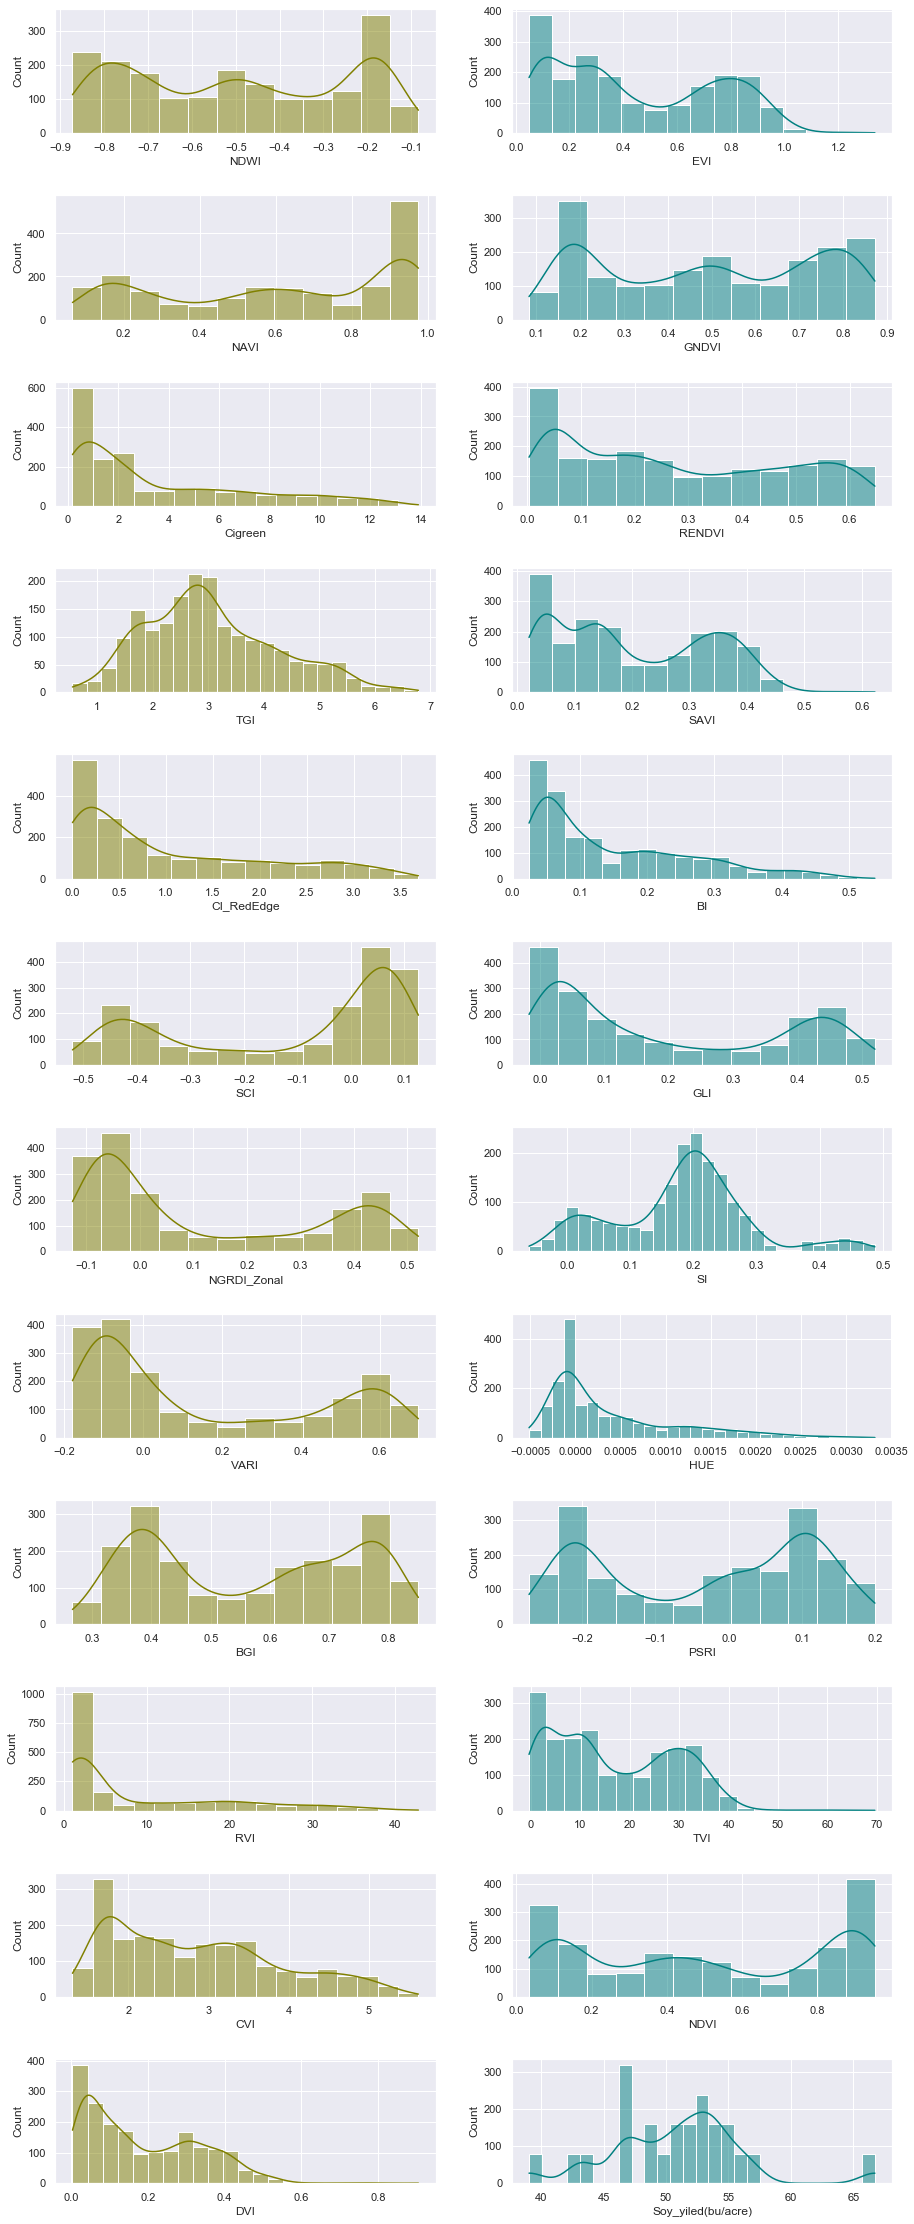

In [79]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = data[veg_indices]
 
fig, axs = plt.subplots(12, 2, figsize=(15, 40))
fig.subplots_adjust(hspace=.5)

sns.histplot(data=df, x="NDWI", kde=True, color="olive", ax=axs[0, 0])
sns.histplot(data=df, x="EVI", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df, x="NAVI", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=df, x="GNDVI", kde=True, color="teal", ax=axs[1, 1])

sns.histplot(data=df, x="Cigreen", kde=True, color="olive", ax=axs[2, 0])
sns.histplot(data=df, x="RENDVI", kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=df, x="TGI", kde=True, color="olive", ax=axs[3, 0])
sns.histplot(data=df, x="SAVI", kde=True, color="teal", ax=axs[3, 1])

sns.histplot(data=df, x="CI_RedEdge", kde=True, color="olive", ax=axs[4, 0])
sns.histplot(data=df, x="BI", kde=True, color="teal", ax=axs[4, 1])
sns.histplot(data=df, x="SCI", kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=df, x="GLI", kde=True, color="teal", ax=axs[5, 1])

sns.histplot(data=df, x="NGRDI_Zonal", kde=True, color="olive", ax=axs[6, 0])
sns.histplot(data=df, x="SI", kde=True, color="teal", ax=axs[6, 1])
sns.histplot(data=df, x="VARI", kde=True, color="olive", ax=axs[7, 0])
sns.histplot(data=df, x="HUE", kde=True, color="teal", ax=axs[7, 1])

sns.histplot(data=df, x="BGI", kde=True, color="olive", ax=axs[8, 0])
sns.histplot(data=df, x="PSRI", kde=True, color="teal", ax=axs[8, 1])
sns.histplot(data=df, x="RVI", kde=True, color="olive", ax=axs[9, 0])
sns.histplot(data=df, x="TVI", kde=True, color="teal", ax=axs[9, 1])

sns.histplot(data=df, x="CVI", kde=True, color="olive", ax=axs[10, 0])
sns.histplot(data=df, x="NDVI", kde=True, color="teal", ax=axs[10, 1])
sns.histplot(data=df, x="DVI", kde=True, color="olive", ax=axs[11, 0])
sns.histplot(data=df, x="Soy_yiled(bu/acre)", kde=True, color="teal", ax=axs[11, 1])

In [91]:
high_yield=data.loc[data['Soy_yiled(bu/acre)']>65]
high_yield.groupby('Cover_Crop_Variety')['Soy_yiled(bu/acre)'].count()

Cover_Crop_Variety
Triticale (TR)    80
Name: Soy_yiled(bu/acre), dtype: int64

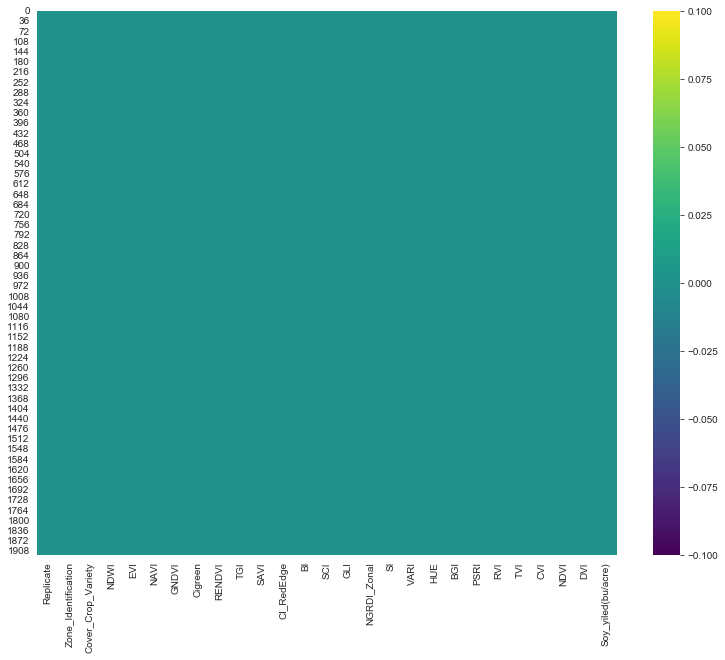

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# check if any missing values in each of the columns
fig, ax = plt.subplots(figsize=(13,10))   
sns.heatmap(slice_data.isnull(), cmap='viridis', ax=ax) # heatmap of missing values

Index(['NDWI', 'EVI', 'NAVI', 'GNDVI', 'Cigreen', 'RENDVI', 'TGI', 'SAVI',
       'CI_RedEdge', 'BI', 'SCI', 'GLI', 'NGRDI_Zonal', 'SI', 'VARI', 'HUE',
       'BGI', 'PSRI', 'RVI', 'TVI', 'CVI', 'NDVI', 'DVI',
       'Soy_yiled(bu/acre)'],
      dtype='object')


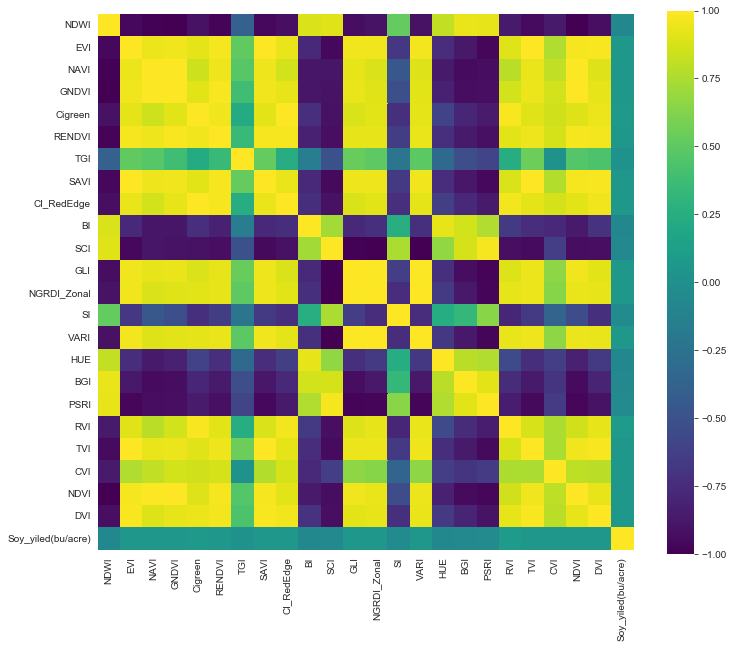

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

veg_indices=slice_data.columns[3:]
print(veg_indices)

data_set_corr_mat=slice_data[veg_indices].corr()
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(data_set_corr_mat, cmap='viridis', square=True)

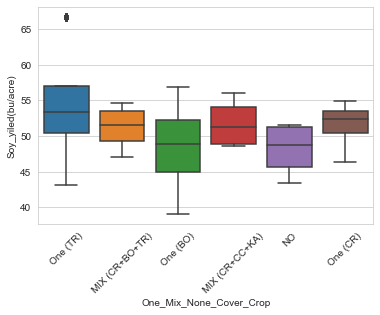

In [29]:
ax=sns.boxplot(x=data['One_Mix_None_Cover_Crop'], y=data['Soy_yiled(bu/acre)'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()